In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.size

4242

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

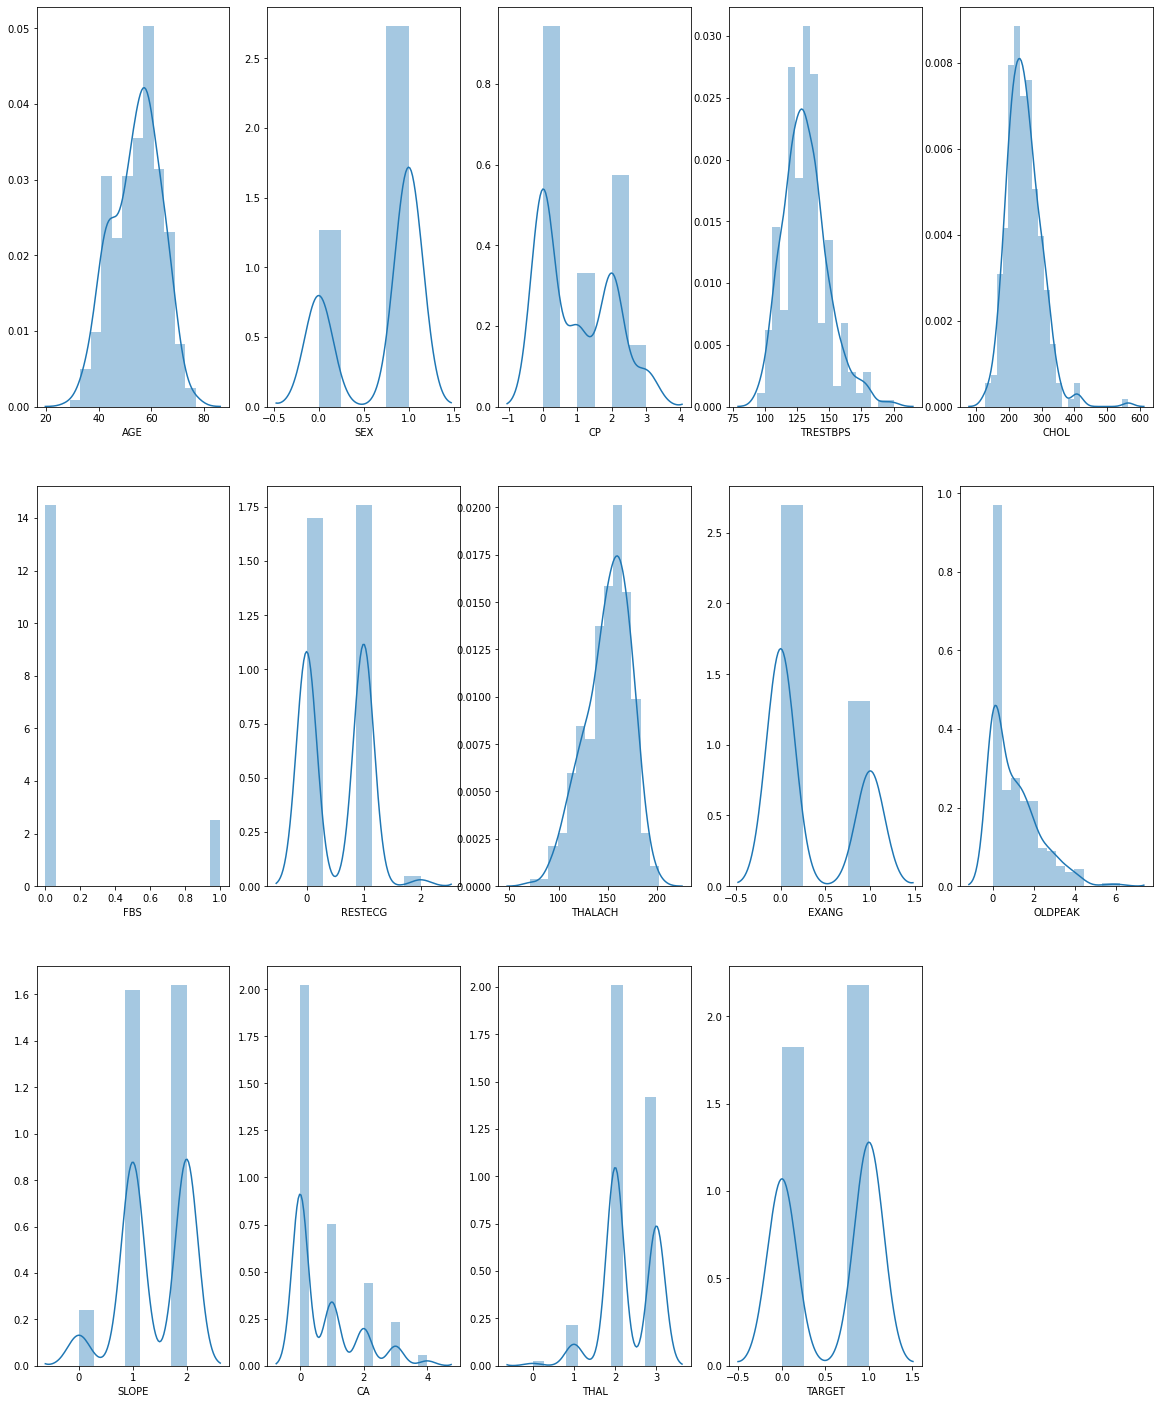

In [23]:
plt.figure(figsize=(20,25))
plotnum=1
for column in df:
    if plotnum<=len(list(df.columns)):
        plt.subplot(3,5,plotnum)
        sns.distplot(df[column])
        plt.xlabel(column.upper())
    plotnum+=1

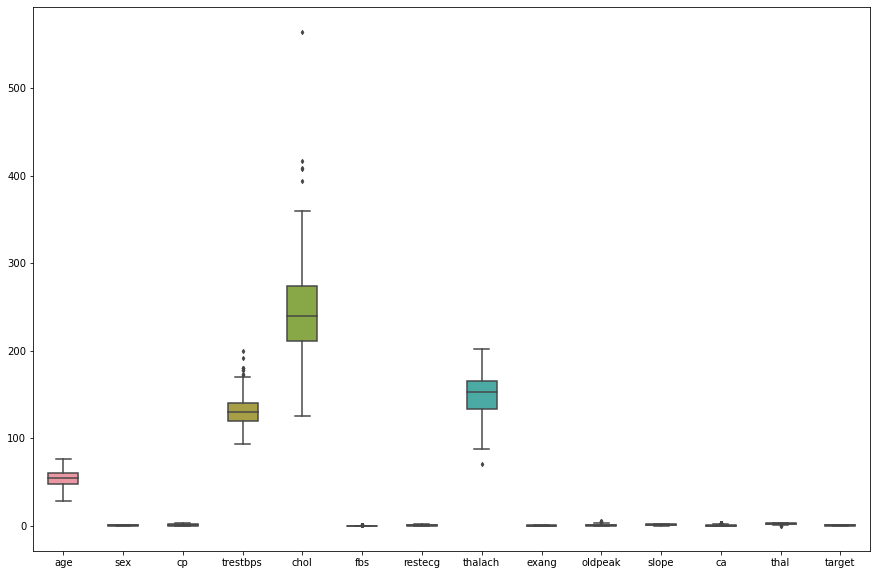

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [25]:
q=df['trestbps'].quantile(0.99)
df_cleaned=df[df['trestbps']<q]

q=df_cleaned['chol'].quantile(0.98)
df_cleaned=df_cleaned[df_cleaned['chol']<q]

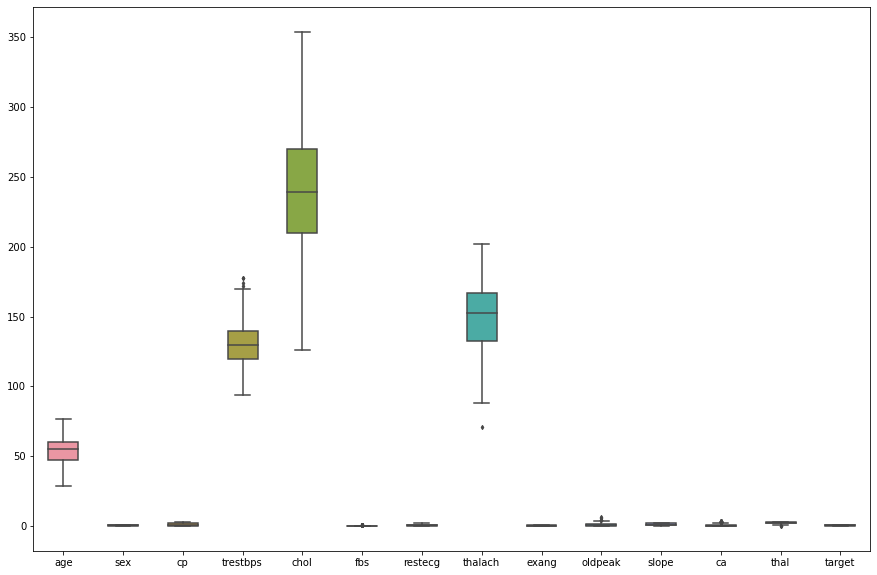

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [27]:
df_cleaned = df_cleaned.sample(frac=1).reset_index(drop=True)

In [28]:
x=df_cleaned.drop(columns=['target'],axis=1)
y=df_cleaned['target']

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1234)

In [49]:
model=LogisticRegression()
model.fit(xtrain,ytrain)
print("Training accuarcy is {}".format(accuracy_score(ytrain,model.predict(xtrain))))
print("Test accuarcy is {}".format(accuracy_score(ytest,model.predict(xtest))))

Training accuarcy is 0.8401826484018264
Test accuarcy is 0.863013698630137


In [45]:
param={'max_depth':list(range(2,7)),'min_samples_split':[2,3,4,5]}
clf=GridSearchCV(DecisionTreeClassifier(),param,n_jobs=-1)
clf.fit(xtrain,ytrain)
print("Training accuarcy is {}".format(accuracy_score(ytrain,clf.predict(xtrain))))
print("Test accuarcy is {}".format(accuracy_score(ytest,clf.predict(xtest))))

Training accuarcy is 0.863013698630137
Test accuarcy is 0.7671232876712328


In [48]:
param={'n_neighbors':list(range(2,9)),'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
clf=GridSearchCV(KNeighborsClassifier(),param,n_jobs=-1)
clf.fit(xtrain,ytrain)
print("Training accuarcy is {}".format(accuracy_score(ytrain,clf.predict(xtrain))))
print("Test accuarcy is {}".format(accuracy_score(ytest,clf.predict(xtest))))

Training accuarcy is 0.7625570776255708
Test accuarcy is 0.6301369863013698


In [ ]:
model1=DecisionTreeClassifier()
model1.fit(xtrain,ytrain)
print("Training accuarcy is {}".format(accuracy_score(ytrain,model1.predict(xtrain))))
print("Test accuarcy is {}".format(accuracy_score(ytest,model1.predict(xtest))))

we have choosen logistic regression instead of other model since it is giving most accurate result

In [50]:
import pickle
with open('modelprediction.sav','wb') as f:
    pickle.dump(model,f)